# TITLE PENDING
### Bachelor's thesis by Lukas Schießer

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

### Preprocessing

In [2]:
pd.options.display.max_columns = None
os.getcwd()
os.chdir("C:/code/Uni/ba/blood-exams")
data = pd.read_excel('covid_study_v2.xlsx')

In [3]:
data.insert(0,'male',data["GENDER"] == "M")
data.insert(0,'female',data["GENDER"] == "F")
data.drop(columns="GENDER", inplace=True)
data['Lymphocytes'] = pd.to_numeric(data['Lymphocytes'], errors='coerce')
data.loc[data["AGE"] < 18, "AGE"] = np.NaN
data.head()

,female,male,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,SWAB
0,False,True,56.0,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,1
1,False,True,56.0,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,1
2,False,True,72.0,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,1
3,False,True,72.0,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,1
4,False,True,77.0,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
data.describe()

,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,SWAB
count,277.000000,277.000000,277.000000,209.000000,208.000000,209.000000,209.000000,208.000000,273.000000,277.000000,266.000000,131.000000,136.000000,194.000000,279.000000
mean,61.776173,8.553069,226.532130,6.200478,1.186538,0.605742,0.055024,0.014423,90.889011,54.202166,44.917293,89.893130,82.477941,380.448454,0.634409
std,17.815695,4.855353,101.174178,4.172581,0.806442,0.410049,0.132237,0.039116,94.421406,57.612797,45.503232,89.089864,132.702506,193.983520,0.482461
min,18.000000,1.100000,20.000000,0.500000,0.200000,0.000000,0.000000,0.000000,0.100000,11.000000,9.000000,34.000000,10.000000,98.000000,0.000000
25%,49.000000,5.100000,163.000000,3.500000,0.700000,0.400000,0.000000,0.000000,21.400000,27.000000,21.000000,57.500000,23.750000,243.250000,0.000000
50%,64.000000,7.100000,205.000000,5.100000,1.000000,0.500000,0.000000,0.000000,54.200000,36.000000,31.000000,71.000000,41.000000,328.000000,1.000000
75%,76.000000,10.700000,271.000000,7.500000,1.400000,0.700000,0.100000,0.000000,129.100000,60.000000,46.000000,90.000000,83.000000,454.500000,1.000000
max,98.000000,29.200000,620.000000,26.400000,7.200000,3.200000,1.300000,0.300000,478.000000,550.000000,335.000000,838.000000,839.000000,1195.000000,1.000000


In [5]:
alpha = 0.05
for col in data.columns[2:-1]:
    # TODO: Perform a Shapiro-Wilk normality test
    stat, p = stats.shapiro(data[col].dropna())

    print('{}: stat={:0.3f}, p={:0.3f}; {}'.format(col, stat, p, 'Probably Normal' if p > alpha else 'Probably not Normal'))

AGE: stat=0.976, p=0.000; Probably not Normal
WBC: stat=0.873, p=0.000; Probably not Normal
Platelets: stat=0.930, p=0.000; Probably not Normal
Neutrophils: stat=0.838, p=0.000; Probably not Normal
Lymphocytes: stat=0.785, p=0.000; Probably not Normal
Monocytes: stat=0.811, p=0.000; Probably not Normal
Eosinophils: stat=0.457, p=0.000; Probably not Normal
Basophils: stat=0.395, p=0.000; Probably not Normal
CRP: stat=0.836, p=0.000; Probably not Normal
AST: stat=0.556, p=0.000; Probably not Normal
ALT: stat=0.629, p=0.000; Probably not Normal
ALP: stat=0.420, p=0.000; Probably not Normal
GGT: stat=0.500, p=0.000; Probably not Normal
LDH: stat=0.877, p=0.000; Probably not Normal


In [6]:
stat, p = stats.shapiro(data.dropna())
print('stat={:0.3f}, p={:0.3f}; {}'.format(stat, p, 'Probably Normal' if p > alpha else 'Probably not Normal'))

stat=0.570, p=0.000; Probably not Normal


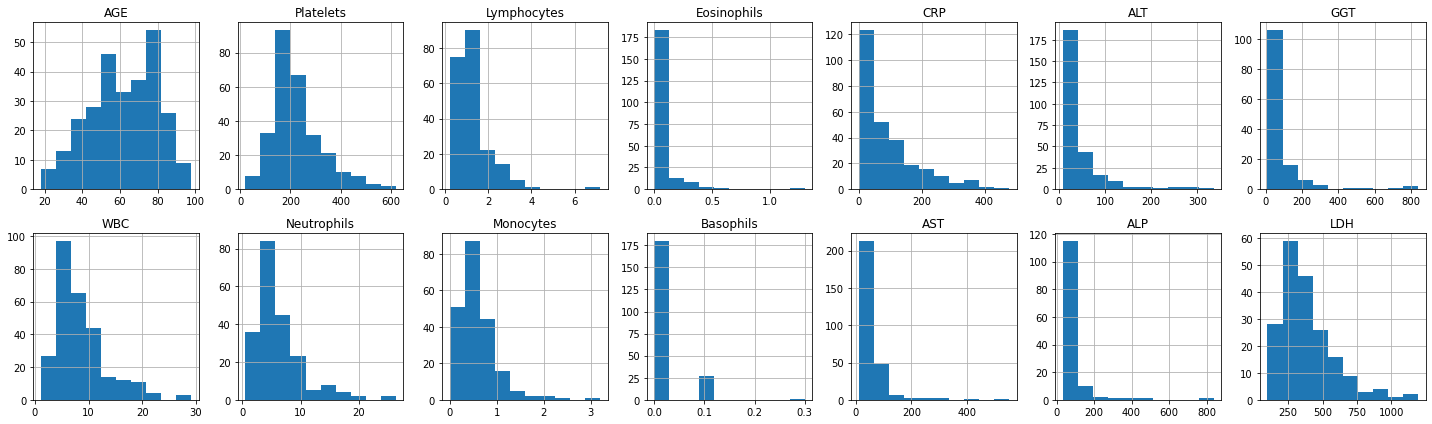

In [35]:
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(20,6))
for x in range(2,16):
    i = x % 2
    j = x // 2 - 1
    data[data.columns[x]].hist(ax=axes[i,j])
    axes[i,j].set_title(data.columns[x])
plt.tight_layout()

In [34]:
for x in range(2,16):
    i = x % 2
    j = x // 2 - 1
    print(i,j, data.columns[x])

0 0 AGE
1 0 WBC
0 1 Platelets
1 1 Neutrophils
0 2 Lymphocytes
1 2 Monocytes
0 3 Eosinophils
1 3 Basophils
0 4 CRP
1 4 AST
0 5 ALT
1 5 ALP
0 6 GGT
1 6 LDH


As you can see, most of the blood values do not follow a standard normal distribution as some would expect from most natural processes. This however does not necessarily constitute a problem since their optimal values can differ from a normal distribution and therefore are not an issue during value imputation.

### Model preparation

In [ ]:
# import all necessary tools
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [ ]:
X, y = data[data.columns[:-1]], data["SWAB"]
# prepare 5-fold nested cross validation by defining outer loop of nested cv
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)
# question 1: paper states that missing data imputation done during nested cross validation,
# but Imputer has to be trained. Train it on whole dataset and then use it for every nested cross-validation subset or train it on subsets?
# start for loop by invoking cv_outer.split(X, y) to get indices for subsetting training and test data
for train_index, test_index in cv_outer.split(X, y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    # do imputation here?
    # define inner loop of nested cross validation
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    # instantiate model for hyperparameter search by means of GridSearch
    model = RandomForestClassifier(random_state=1)
    # define the search space over which GridSearch should 
    space = {}
    space['n_estimators'] = [10, 100, 500]
    space['max_features'] = [2, 4, 6]
    # define GridSearch for nested cv
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    yhat = best_model.predict(X_test)
    # evaluate the model

[[1]](https://stats.stackexchange.com/questions/437487/cross-validation-and-multiple-imputation-for-missing-data) seems to indicate that training should happen on subset